In [89]:
#建立一个测试函数性能的函数，核心是repeat
def perf_comp_data(func_list, data_list, rep=3, number=1):
    '''function to compare performance of different functions
    parameters
    ============
    func_list : list
        list with function names as strings
    data_list: list
        list with data names as strings
    rep : int
        number of repetition of the whole comparation 
    numb : int
        the number of executions for every funtion    
    
    '''
    from timeit import repeat 
    res_list = {} #定义一个字典文件
    for name in enumerate(func_list): #同时遍历程序列表中索引和程序名,返回enumerate object。[0]=索引，[1]=内容
        stmt = name[1] + '(' +  data_list[name[0]] + ')'
        setup = "from __main__ import " + name[1] + ', ' \
                                    + data_list[name[0]]
        results = repeat(stmt=stmt, setup=setup, 
                         repeat=rep, number=number) #stmt代表计算公式， setup引入必要公式和数据。参数名为repeat, 不是rep
        res_list[name[1]] = sum(results) / rep #将平均结果储存到字典文件
    res_sort = sorted(res_list.items(), 
                      key=lambda x: (x[1], x[0])) #按表现排名
#打印输出结果
    for item in res_sort:
        rel = item[1] / res_sort[0][1]
        print ('function ' + item[0] + ', av. time sec: %9.5f' %item[1] + 'relative: %6.5f' % rel) #字符串内传值  

In [62]:
from math import * #引入math的所有方法
def f(x):
    return abs(cos(x)) ** 0.5 + sin(2 + 3 * x) 
I = 500000
a_py = range(I)

In [63]:
def f1(a):
    res = []
    for x in a:
        res.append(f(x))
    return res


In [64]:
def f2(a):
    return [f(x) for x in a]

In [65]:
def f3(a):
    ex = 'abs(cos(x) )** 0.5 + sin(2 + 3 * x)' #字符会的表达式
    return[eval(ex) for x in a] #eval函数会重新运算求出参数的内容，是一个可以将字符串参数转换成表达式的函数。

In [66]:
import numpy as np
a_np = np.arange(I)

In [67]:
def f4(a):
    return(np.abs(np.cos(a)) ** 0.5 + np.sin(2 + 3 * a)) #a本身是循环，所有的循环再np内部进行，不需要for 迭代

In [68]:
import numexpr as ne #计算表达式，高级库，不需要for迭代
def f5(a):
    ex = 'abs(cos(a)) ** 0.5 + sin(2 + 3 * a)'
    ne.set_num_threads(1) #单线程
    return ne.evaluate(ex) #不需要for 循环

In [69]:
def f6(a):
    ex = 'abs(cos(a)) ** 0.5 + sin(2 + 3 * a)'
    ne.set_num_threads(16) #多线程
    return ne.evaluate(ex) #不需要for 循环

In [70]:
%%time 
r1 = f1(a_py) #对于标准的python，参数为a_py
r2 = f2(a_py)
r3 = f3(a_py)
r4 = f4(a_np) #对于高级的库，例如numpy，numexpr等，其迭代在内部进行，其参数为np的数组
r5 = f5(a_np)
r6 = f6(a_np)

Wall time: 16.9 s


In [71]:
np.allclose(r1,r2) #验证各计算结果是否一致

True

In [72]:
np.allclose(r1,r6)

True

In [73]:
func_list = ['f1','f2','f3','f4','f5','f6',] #命令：直接把6个方程极其参数都传递给比较方程
data_list = ['a_py','a_py','a_py','a_np','a_np','a_np',]

In [90]:
perf_comp_data(func_list, data_list)
'''
高级库，多线程的方法运算更快
python内的迭代最慢
'''

function f6, av. time sec:   0.02607relative: 1.00000
function f5, av. time sec:   0.03727relative: 1.42978
function f4, av. time sec:   0.07278relative: 2.79221
function f2, av. time sec:   0.44772relative: 17.17691
function f1, av. time sec:   0.54355relative: 20.85333
function f3, av. time sec:  14.33984relative: 550.14633


In [91]:
#numpy可以设定数据在硬盘的类型，以及分布：layout，其运算效率迥异， order决定数据的顺序：C或者Fortran公式翻译程式语言（formula translator）
# order='C'或者order='F', C方式排列是以行为基础 rowwise，各行相临

In [95]:
np.zeros((3,3), dtype=np.float64, order='C') #定义数据类型，以及数据结构，采用类似C语言的数据

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [101]:
x = np.random.standard_normal((3,1500000))
C = np.array(x, order='C')
F = np.array(x, order='F')
x = 0.0 #清除内存
#两个方向的轴计算速度差一倍

In [103]:
%time C.sum(axis=0)

Wall time: 14 ms


array([ 0.57522135,  0.83346518,  0.66493489, ...,  0.30091394,
       -1.53713069,  1.18964091])

In [104]:
%time C.sum(axis=1)

Wall time: 9 ms


array([ 1626.31213362,  1002.17676438, -1568.28185048])

In [105]:
%time C.std(axis=0)

Wall time: 71 ms


array([ 0.60909133,  0.4650752 ,  1.14837321, ...,  0.36137126,
        0.51698625,  0.30527665])

In [106]:
%time C.std(axis=1)
#计算标准差的表现也是axis=1更快

Wall time: 36 ms


array([ 1.00074308,  1.00087611,  0.99984116])

In [ ]:
#F顺序的数组，整体慢，两个方向计算得差不多。

In [107]:
%time F.sum(axis=0)

Wall time: 43 ms


array([ 0.57522135,  0.83346518,  0.66493489, ...,  0.30091394,
       -1.53713069,  1.18964091])

In [108]:
%time F.sum(axis=1)

Wall time: 35 ms


array([ 1626.31213362,  1002.17676438, -1568.28185048])

In [109]:
%time F.std(axis=0)

Wall time: 151 ms


array([ 0.60909133,  0.4650752 ,  1.14837321, ...,  0.36137126,
        0.51698625,  0.30527665])

In [110]:
%time F.std(axis=1)

Wall time: 139 ms


array([ 1.00074308,  1.00087611,  0.99984116])

In [ ]:
# parallel ipython自带的多线程计算库

In [210]:
def bsm_mcs_valuation(strike):
    '''Dynamic Black-Scholes-Merton Monte Carlo estimator for European calls.
    Parameters
    ==========
    strike : float
    strike price of the option
    
    Results
    =======
    value : float
    estimate for present value of call option
    '''
    import numpy as np
    S0 = 100.
    T = 1.0 
    r = 0.05
    vola = 0.2
    M = 50 #分成50步，属于将微分离散的方法
    I = 20000
    dt = T / M #将周期分成50步，类似微积分
    rand = np.random.standard_normal((M + 1, I)) #51行，代表模拟50步，2万列，每列代表一个模拟值
    S = np.zeros((M + 1, I)) #建立多维数组用于储存模拟结果
    S[0] = S0 #每条路径的S初始值都是S0
    for t in range(1, M+1):#从1到51，遍历一遍
        S[t] = S[t-1] * np.exp((r - 0.5 * vola ** 2) * dt
                               + vola * np.sqrt(dt) * rand[t]) #每一期的值都源自上一期. rand模拟风险因素变动
    value =  (np.exp(-r * T) * np.sum(np.maximum(S[-1]-strike, 0)) / I) #行权时的期权价格求均值后贴现到现在。该句要在迭代外
    return value #返回一个数值，而不是一组数值   
    

In [211]:
def seq_value(n):
    '''建立用顺序方法对期权进行估值的函数， n代表行权价格的数量
    Parameters
    ==========
    n : int
        number of options valuations / strikes
    '''
    strikes = np.linspace(80, 120, n) #分为n份，行权价格介于80和120之间
    option_values = [] #将估值结果储存在lis中
    for strike in strikes:
        option_values.append(bsm_mcs_valuation(strike))
    return strikes, option_values

In [212]:
n = 100 #对于100个不同的行权价格进行估值
%time strikes, option_values_seq = seq_value(n)

Wall time: 8.09 s


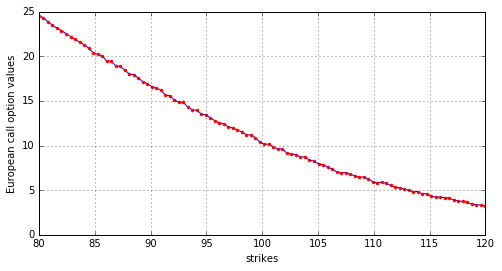

In [214]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize=(8,4))
plt.plot(strikes, option_values_seq, 'b')
plt.plot(strikes, option_values_seq, 'r.')
plt.grid(True)
plt.xlabel('strikes')
plt.ylabel('European call option values')